# Nutrition: Predicting Body composition (PC1)

The aim of these analyses are to determine whether a variety of features (diet, age, sex, income, exercise, smoking, alcohol use etc) predict the first body composition principal component (see nutrition-pca-u.ipynb for more info about this component).

Since all the dependent variables are continious, I will be using the following supervised regression models: 

* Multiple linear regression (forward method), 
* Regression tree, 
* Random forest, 
* Gradient boosting tree
* Support vector regression.

## 1. Install and import the necesary packages and libraries

I already have the most recent versions of **pandas, numpy, seaborn and matplotlib** installed, but you can install them using pip (see pypi.org) or conda install in Anaconda prompt (see anaconda.org). If you get the ImportError: cannot import name 'html5lib' from 'pip._vendor', you can install html5lib in Anaconda prompt (conda install -c anaconda html5lib).

Currently installed versions: 
<br>Pandas 1.4.4
<br>numpy 1.21.5
<br>seaborn 0.12.2
<br>matplotlib 3.5.1
<br>scikit learn 1.1.1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from tabulate import tabulate
from sklearn import tree

## 2. Read csv file into Pandas dataframe

In [2]:
#Read the csv file into the pandas dataframe
df2 = pd.read_csv('nutrition2.csv')

# If the rows are truncated so we can't see the full list, you can correct that with:
pd.set_option('display.max_rows', None)

#Let's display max columns too 
pd.set_option('display.max_columns', None)

df2.head()

,Unnamed: 0,id,age,sex,income,items_home,cold_flu,antibiotics,ill_7days,ill_now,exercise_stren,exercise_mod,fruit_juice,fruit,veg,red_meat,chicken,pork,fish,eggs,bread,pap_samp,rice_pasta,dairy,soft_drinks,take_away,smoke,alcohol,avg_systbp,avg_diabp,body_fat,muscle_mass,bmi,visceral_fat,metabolic_age,bfat_rarm,bfat_rleg,bfat_trunk,ecw_percentage,fat_rarm,fat_rleg,fat_trunk,muscle_rarm,muscle_rleg,muscle_trunk,left_grip,right_grip,sitting_height,standing_height,exercise,fruitveg_index,carbs_index,protein_index,junkfood_index,avg_grip,age_scaled,cold_flu_scaled,antibiotics_scaled,fruit_juice_scaled,fruit_scaled,veg_scaled,red_meat_scaled,chicken_scaled,pork_scaled,fish_scaled,eggs_scaled,bread_scaled,pap_samp_scaled,rice_pasta_scaled,dairy_scaled,soft_drinks_scaled,take_away_scaled,avg_systbp_scaled,avg_diabp_scaled,body_fat_scaled,muscle_mass_scaled,bmi_scaled,visceral_fat_scaled,metabolic_age_scaled,bfat_rarm_scaled,bfat_rleg_scaled,bfat_trunk_scaled,ecw_percentage_scaled,fat_rarm_scaled,fat_rleg_scaled,fat_trunk_scaled,muscle_rarm_scaled,muscle_rleg_scaled,muscle_trunk_scaled,sitting_height_scaled,standing_height_scaled,exercise_scaled,fruitveg_index_scaled,carbs_index_scaled,protein_index_scaled,junkfood_index_scaled,avg_grip_scaled,infections_index,infections_index_scaled,pc1_bodycomp,pc2_bodycomp
0,0,1,20.8,1,2,7,1,0,False,False,0,1,2,5,8,3,3,0,0,1,6,4,4,8,6,3,False,True,119.0,71.5,3.2,51.7,18.1,1,12,7.0,2.0,3.0,38.4,0.2,0.2,0.9,3.0,9.8,26.6,50,50,131.5,176.4,1,15,14,7,9,50.0,0.258929,0.1,0.0,0.25,0.625,1.000,0.375,0.375,0.0,0.00,0.125,0.750,0.500,0.500,1.000,0.750,0.375,0.587629,0.492958,0.000000,0.498851,0.111913,0.000000,0.000000,0.031311,0.000000,0.000000,0.313433,0.000000,0.000000,0.000000,0.545455,0.602410,0.465753,0.746388,0.581395,0.047619,0.714286,0.583333,0.285714,0.5625,0.724490,0.1,0.027778,-1.106312,0.227749
1,1,2,20.6,0,2,9,2,0,False,False,0,7,0,0,5,0,5,0,0,6,8,6,6,4,2,5,False,True,119.0,74.0,20.3,36.2,17.4,1,12,18.1,29.2,14.3,40.6,0.4,2.6,3.7,1.7,6.0,21.0,23,26,129.9,165.8,7,5,20,11,7,24.5,0.241071,0.2,0.0,0.00,0.000,0.625,0.000,0.625,0.0,0.00,0.750,1.000,0.750,0.750,0.500,0.250,0.625,0.587629,0.528169,0.372549,0.142529,0.086643,0.000000,0.000000,0.248532,0.509363,0.261574,0.477612,0.052632,0.235294,0.124444,0.151515,0.144578,0.210046,0.720706,0.375969,0.333333,0.238095,0.833333,0.476190,0.4375,0.204082,0.2,0.055556,-0.318955,-0.635933
2,2,3,19.9,0,2,4,1,1,True,True,0,7,0,2,4,1,1,0,4,0,8,0,8,3,1,2,False,False,101.5,63.0,20.0,33.3,18.5,1,12,22.5,30.1,11.8,40.9,0.5,2.6,2.7,1.5,5.7,19.1,22,24,123.2,154.0,7,6,16,6,3,23.0,0.178571,0.1,0.1,0.00,0.250,0.500,0.125,0.125,0.0,0.50,0.000,1.000,0.000,1.000,0.375,0.125,0.250,0.407216,0.373239,0.366013,0.075862,0.126354,0.000000,0.000000,0.334638,0.526217,0.203704,0.500000,0.078947,0.235294,0.080000,0.090909,0.108434,0.123288,0.613162,0.147287,0.333333,0.285714,0.666667,0.238095,0.1875,0.173469,2.2,0.611111,-0.252522,-0.825377
3,3,4,23.1,0,2,9,1,0,True,False,3,5,0,8,2,0,4,0,0,3,1,0,5,4,1,0,False,False,117.0,78.0,39.6,42.9,29.6,6,38,45.4,42.6,36.4,44.8,1.7,5.7,14.8,1.9,7.3,24.6,31,35,124.5,159.0,11,10,6,7,1,33.0,0.464286,0.1,0.0,0.00,1.000,0.250,0.000,0.500,0.0,0.00,0.375,0.125,0.000,0.625,0.500,0.125,0.000,0.567010,0.584507,0.793028,0.296552,0.527076,0.357143,0.838710,0.782779,0.760300,0.773148,0.791045,0.394737,0.539216,0.617778,0.212121,0.301205,0.374429,0.634029,0.244186,0.523810,0.476190,0.250000,0.285714,0.0625,0.377551,1.1,0.305556,1.085679,-0.022105
4,4,5,22.5,0,1,9,1,1,False,False,0,5,4,7,3,4,5,0,2,2,8,5,2,0,5,6,False,False,118.5,83.0,24.6,42.0,22.3,1,15,23.0,35.1,17.5,40.8,0.7,3.8,5.5,2.1,6.6,24.8,24,30,127.5,162.5,5,14,15,13,11,27.0,0.410714,0.1,0.1,0.50,0.875,0.375,0.500,0.625,0.0,0.25,0.250,1.000,0.625,0.250,0.000,0.625,0.750,0.582474,0.654930,0.466231,0.275862,0.263538,0.000000,0.096774,0.344423,0.619850,0.335648,0.492537,0.131579,0.352941,0.204444,0.272727,0.216867,0.383562,0.682183,0.312016,0.238095,0.666667,0.625000,0.571429,0.6875,0.255102,0.2,0.055556,-

In [3]:
df2 = df2.drop(['Unnamed: 0'], axis=1)
df2.head()

,id,age,sex,income,items_home,cold_flu,antibiotics,ill_7days,ill_now,exercise_stren,exercise_mod,fruit_juice,fruit,veg,red_meat,chicken,pork,fish,eggs,bread,pap_samp,rice_pasta,dairy,soft_drinks,take_away,smoke,alcohol,avg_systbp,avg_diabp,body_fat,muscle_mass,bmi,visceral_fat,metabolic_age,bfat_rarm,bfat_rleg,bfat_trunk,ecw_percentage,fat_rarm,fat_rleg,fat_trunk,muscle_rarm,muscle_rleg,muscle_trunk,left_grip,right_grip,sitting_height,standing_height,exercise,fruitveg_index,carbs_index,protein_index,junkfood_index,avg_grip,age_scaled,cold_flu_scaled,antibiotics_scaled,fruit_juice_scaled,fruit_scaled,veg_scaled,red_meat_scaled,chicken_scaled,pork_scaled,fish_scaled,eggs_scaled,bread_scaled,pap_samp_scaled,rice_pasta_scaled,dairy_scaled,soft_drinks_scaled,take_away_scaled,avg_systbp_scaled,avg_diabp_scaled,body_fat_scaled,muscle_mass_scaled,bmi_scaled,visceral_fat_scaled,metabolic_age_scaled,bfat_rarm_scaled,bfat_rleg_scaled,bfat_trunk_scaled,ecw_percentage_scaled,fat_rarm_scaled,fat_rleg_scaled,fat_trunk_scaled,muscle_rarm_scaled,muscle_rleg_scaled,muscle_trunk_scaled,sitting_height_scaled,standing_height_scaled,exercise_scaled,fruitveg_index_scaled,carbs_index_scaled,protein_index_scaled,junkfood_index_scaled,avg_grip_scaled,infections_index,infections_index_scaled,pc1_bodycomp,pc2_bodycomp
0,1,20.8,1,2,7,1,0,False,False,0,1,2,5,8,3,3,0,0,1,6,4,4,8,6,3,False,True,119.0,71.5,3.2,51.7,18.1,1,12,7.0,2.0,3.0,38.4,0.2,0.2,0.9,3.0,9.8,26.6,50,50,131.5,176.4,1,15,14,7,9,50.0,0.258929,0.1,0.0,0.25,0.625,1.000,0.375,0.375,0.0,0.00,0.125,0.750,0.500,0.500,1.000,0.750,0.375,0.587629,0.492958,0.000000,0.498851,0.111913,0.000000,0.000000,0.031311,0.000000,0.000000,0.313433,0.000000,0.000000,0.000000,0.545455,0.602410,0.465753,0.746388,0.581395,0.047619,0.714286,0.583333,0.285714,0.5625,0.724490,0.1,0.027778,-1.106312,0.227749
1,2,20.6,0,2,9,2,0,False,False,0,7,0,0,5,0,5,0,0,6,8,6,6,4,2,5,False,True,119.0,74.0,20.3,36.2,17.4,1,12,18.1,29.2,14.3,40.6,0.4,2.6,3.7,1.7,6.0,21.0,23,26,129.9,165.8,7,5,20,11,7,24.5,0.241071,0.2,0.0,0.00,0.000,0.625,0.000,0.625,0.0,0.00,0.750,1.000,0.750,0.750,0.500,0.250,0.625,0.587629,0.528169,0.372549,0.142529,0.086643,0.000000,0.000000,0.248532,0.509363,0.261574,0.477612,0.052632,0.235294,0.124444,0.151515,0.144578,0.210046,0.720706,0.375969,0.333333,0.238095,0.833333,0.476190,0.4375,0.204082,0.2,0.055556,-0.318955,-0.635933
2,3,19.9,0,2,4,1,1,True,True,0,7,0,2,4,1,1,0,4,0,8,0,8,3,1,2,False,False,101.5,63.0,20.0,33.3,18.5,1,12,22.5,30.1,11.8,40.9,0.5,2.6,2.7,1.5,5.7,19.1,22,24,123.2,154.0,7,6,16,6,3,23.0,0.178571,0.1,0.1,0.00,0.250,0.500,0.125,0.125,0.0,0.50,0.000,1.000,0.000,1.000,0.375,0.125,0.250,0.407216,0.373239,0.366013,0.075862,0.126354,0.000000,0.000000,0.334638,0.526217,0.203704,0.500000,0.078947,0.235294,0.080000,0.090909,0.108434,0.123288,0.613162,0.147287,0.333333,0.285714,0.666667,0.238095,0.1875,0.173469,2.2,0.611111,-0.252522,-0.825377
3,4,23.1,0,2,9,1,0,True,False,3,5,0,8,2,0,4,0,0,3,1,0,5,4,1,0,False,False,117.0,78.0,39.6,42.9,29.6,6,38,45.4,42.6,36.4,44.8,1.7,5.7,14.8,1.9,7.3,24.6,31,35,124.5,159.0,11,10,6,7,1,33.0,0.464286,0.1,0.0,0.00,1.000,0.250,0.000,0.500,0.0,0.00,0.375,0.125,0.000,0.625,0.500,0.125,0.000,0.567010,0.584507,0.793028,0.296552,0.527076,0.357143,0.838710,0.782779,0.760300,0.773148,0.791045,0.394737,0.539216,0.617778,0.212121,0.301205,0.374429,0.634029,0.244186,0.523810,0.476190,0.250000,0.285714,0.0625,0.377551,1.1,0.305556,1.085679,-0.022105
4,5,22.5,0,1,9,1,1,False,False,0,5,4,7,3,4,5,0,2,2,8,5,2,0,5,6,False,False,118.5,83.0,24.6,42.0,22.3,1,15,23.0,35.1,17.5,40.8,0.7,3.8,5.5,2.1,6.6,24.8,24,30,127.5,162.5,5,14,15,13,11,27.0,0.410714,0.1,0.1,0.50,0.875,0.375,0.500,0.625,0.0,0.25,0.250,1.000,0.625,0.250,0.000,0.625,0.750,0.582474,0.654930,0.466231,0.275862,0.263538,0.000000,0.096774,0.344423,0.619850,0.335648,0.492537,0.131579,0.352941,0.204444,0.272727,0.216867,0.383562,0.682183,0.312016,0.238095,0.666667,0.625000,0.571429,0.6875,0.255102,0.2,0.055556,-0.062037,-0.399174


## 3. Feature selection

We will use individual correlations to select features instead of sequential feature selection (see vcoetzee/compare for why I prefer individual correlations).

In [4]:
#Select the variables we want to use for the body composition analyses (PC1)
#Minimally transformed - Scaled (see vcoetzee/compare for why I prefer MinMax scaled, minimally transformed variables)
BC_PC1 = df2[['age_scaled', 'sex', 'income', 'items_home', 'exercise_scaled','fruitveg_index_scaled', 'carbs_index_scaled', 'protein_index_scaled', 'junkfood_index_scaled', 'dairy_scaled', 'smoke', 'alcohol', 'pc1_bodycomp']]

In [5]:
#Identify the most highly correlated variables
BC_PC1.corrwith(BC_PC1['pc1_bodycomp']).sort_values(ascending=False)

#Most highly correlated: sex(-0.220284), exercise_scaled(-0.209703), age_scaled (0.128274) and carbs_index_scaled (-0.078935)

pc1_bodycomp             1.000000
fruitveg_index_scaled    0.097614
age_scaled               0.059920
items_home               0.017608
income                   0.017195
smoke                   -0.002988
junkfood_index_scaled   -0.029488
dairy_scaled            -0.063464
protein_index_scaled    -0.068263
alcohol                 -0.071013
carbs_index_scaled      -0.083091
exercise_scaled         -0.187891
sex                     -0.274787
dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


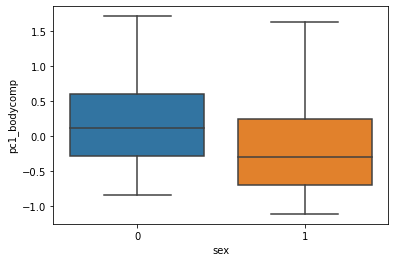

In [6]:
# Visualise the relationships
print(sns.boxplot(data=BC_PC1, x='sex', y='pc1_bodycomp'))

#Females (sex=0) has a higher pc1_bodycomp (i.e. they score higher on the fat component, with higher values on this component indicating body types that are higher

AxesSubplot(0.125,0.125;0.775x0.755)


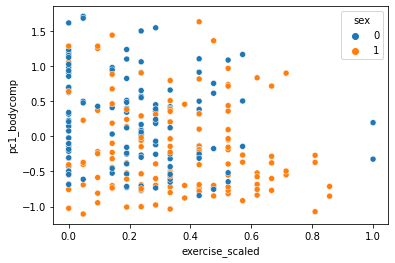

In [7]:
print(sns.scatterplot(data=BC_PC1, x='exercise_scaled', y='pc1_bodycomp', hue='sex'))

AxesSubplot(0.125,0.125;0.775x0.755)


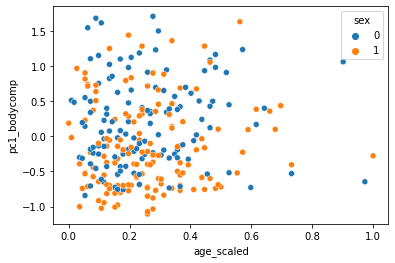

In [8]:
print(sns.scatterplot(data=BC_PC1, x='age_scaled', y='pc1_bodycomp', hue='sex'))

AxesSubplot(0.125,0.125;0.775x0.755)


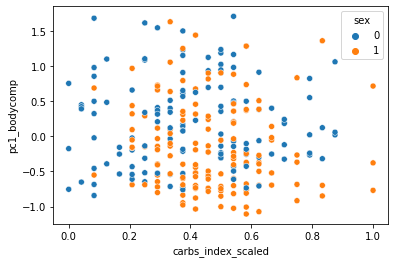

In [9]:
print(sns.scatterplot(data=BC_PC1, x='carbs_index_scaled', y='pc1_bodycomp', hue='sex'))

#All relationships fairly week

## 4. Forward linear regression

In [10]:
# Define testing and traing set
x = df2[['age_scaled', 'sex', 'income', 'items_home', 'exercise_scaled','fruitveg_index_scaled', 'carbs_index_scaled', 'protein_index_scaled', 'junkfood_index_scaled', 'dairy_scaled', 'smoke', 'alcohol']].values
y = df2[['pc1_bodycomp']].values #.values creates a numpy array

#Splitting the dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)
print()

Train set: (216, 12) (216, 1)
Test set: (54, 12) (54, 1)



In [11]:
#Fit the model - according to correlations
#Step 1
x_train1 = x_train[:, [1]] #sex
x_test1 = x_test[:, [1]]
lr1 = LinearRegression()
lr1.fit(x_train1, y_train)

#Evaluate the model
y_pred1=lr1.predict(x_test1)

#Evaluate the predictions
lr_R21 = r2_score(y_test, y_pred1)
lr_MSE1 = mean_squared_error(y_test, y_pred1)
print('Step1 R2:', lr_R21)
print('Step1 MSE:', lr_MSE1)
print()
  
#_________________________________
#Step 2
x_train2 = x_train[:, [1,4]] #sex, exercise
x_test2 = x_test[:, [1,4]]
regr2 = LinearRegression()
regr2.fit(x_train2, y_train)

#Evaluate the model
y_pred2=regr2.predict(x_test2)

#Evaluate the predictions
lr_R22 = r2_score(y_test, y_pred2)
lr_MSE2 = mean_squared_error(y_test, y_pred2)
print('Step2 R2:', lr_R22)
print('Step2 MSE:', lr_MSE2)
print()

#____________________________________
#Step 3
x_train3 = x_train[:, [1,4,0]] #sex, exercise, age
x_test3 = x_test[:, [1,4,0]]
regr3 = LinearRegression()
regr3.fit(x_train3, y_train)

#Evaluate the model
y_pred3=regr3.predict(x_test3)

#Evaluate the predictions
lr_R23 = r2_score(y_test, y_pred3)
lr_MSE3 = mean_squared_error(y_test, y_pred3)
print('Step3 R2:', lr_R23)
print('Step3 MSE:', lr_MSE3)
print()

#____________________________________
#Step 4
x_train4 = x_train[:, [1,4,0,6]] #sex, exercise, age, carbs_index
x_test4 = x_test[:, [1,4,0,6]]
regr4 = LinearRegression()
regr4.fit(x_train4, y_train)

#Evaluate the model
y_pred4=regr4.predict(x_test4)

#Evaluate the predictions
lr_R24 = r2_score(y_test, y_pred4)
lr_MSE4 = mean_squared_error(y_test, y_pred4)
print('Step4 R2:', lr_R24)
print('Step4 MSE:', lr_MSE4)
print()

# Step 2 (sex & exercise) had the highest R2 and the lowest MSE, but overall a very poor prediction

Step1 R2: 0.03853982225823116
Step1 MSE: 0.35411952974535693

Step2 R2: -0.010544644914591395
Step2 MSE: 0.37219804078038154

Step3 R2: -0.024845608617909187
Step3 MSE: 0.377465290177459

Step4 R2: -0.05327580161197987
Step4 MSE: 0.38793653673212813



In [12]:
#Check for multicolinearity

# Convert numpy to df
vif_df = pd.DataFrame(x_train2, columns = ['sex', 'exercise_scaled'])

# Convert datatypes to float
vif_df[['sex', 'exercise_scaled']] = vif_df[['sex', 'exercise_scaled']].astype('float')


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns

  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vif_df.values, i)
                          for i in range(len(vif_df.columns))]

  
print(vif_data)

# Generally, a VIF above 5 indicates a high multicollinearity and a VIF above 10 needs to be corrected
# All the VIF's are in the acceptable range, indicating that there are no major issues with multicolinearity

           feature       VIF
0              sex  1.865078
1  exercise_scaled  1.865078


## 5. Regression tree

In [13]:
# Create the regressor
rt = DecisionTreeRegressor(random_state=1)

# Train the regressor 
rt.fit(x_train, y_train)

# Predicting the test data
y_pred_rt = rt.predict(x_test)

#Evaluate the predictions
#Calculate R2 score (higher R2=better performance) and MSE scores (lower MSE = better performance)
rt_R2 = r2_score(y_test, y_pred_rt)
rt_MSE = mean_squared_error(y_test, y_pred_rt)
print('Regression tree R2:', rt_R2)
print('Regression tree MSE:', rt_MSE)
print()

# Poor prediction despite max_depth=none

Regression tree R2: -1.7496955819081732
Regression tree MSE: 1.0127521960350312



In [14]:
# Pruning the tree
depth=[]
for i in range(1,4):
    regressor = DecisionTreeRegressor(random_state=1, criterion='squared_error', max_depth=i)
    model = regressor.fit(x_train, y_train)
    # Perform 5-fold cross validation 
    model_scores = cross_val_score(model, x_train, y_train, cv = 5, scoring='r2')
    print("mean R2 cross validation score: {}".format(np.mean(model_scores)))

    #Predict the response for test dataset
    y_pred = model.predict(x_test)
    depth.append(mean_squared_error(y_test, y_pred))
print('MSE:', depth)

#The max depth=1 tree produced the highest R2 and lowest MSE

mean R2 cross validation score: -0.05246985665794426
mean R2 cross validation score: -0.1460680521888107
mean R2 cross validation score: -0.3058648676473522
MSE: [0.35411952974535693, 0.37516084214246886, 0.42551288312783936]


Regression tree R2: 0.03853982225823116
Regression tree MSE: 0.35411952974535693



[Text(0.5, 0.75, 'sex <= 0.5\nsquared_error = 0.428\nsamples = 216\nvalue = 0.017'),
 Text(0.25, 0.25, 'squared_error = 0.393\nsamples = 102\nvalue = 0.212'),
 Text(0.75, 0.25, 'squared_error = 0.394\nsamples = 114\nvalue = -0.157')]

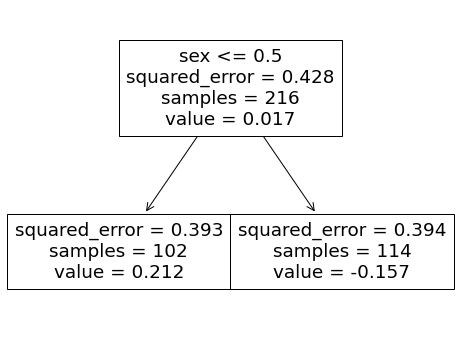

In [15]:
# Create the regressor for max_depth=1
rt2 = DecisionTreeRegressor(max_depth=1, random_state=1)

# Train the regressor 
rt2.fit(x_train, y_train)

# Predicting the test data
y_pred_rt2 = rt2.predict(x_test)

#Evaluate the predictions
#Calculate R2 score (higher R2=better performance) and MSE scores (lower MSE = better performance)
rt2_R2 = r2_score(y_test, y_pred_rt2)
rt2_MSE = mean_squared_error(y_test, y_pred_rt2)
print('Regression tree R2:', rt2_R2)
print('Regression tree MSE:', rt2_MSE)
print()

# plot tree
plt.figure(figsize=(8,6))# set plot size (denoted in inches)
tree.plot_tree(rt2, feature_names=['age_scaled', 'sex', 'income', 'items_home', 'exercise_scaled','fruitveg_index_scaled', 'carbs_index_scaled', 'protein_index_scaled', 'junkfood_index_scaled', 'dairy_scaled', 'smoke', 'alcohol', 'rs174547', 'rs9939609'])

## 4. Random Forest

In [16]:
# Flatten y (otherwise you get the error: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().)
y_train1_1 = np.ravel(y_train, order = 'C')
print('y_train shape:', y_train1_1.shape)
y_test1_1 = np.ravel(y_test, order = 'C')
print('y_test shape:', y_test1_1.shape)

# Create the regressor
rf = RandomForestRegressor(n_estimators = 1000, random_state=1)

# Train the regressor
rf.fit(x_train, y_train1_1) 

# Predicting the test data
y_pred_rf = rf.predict(x_test)

#Evaluate the predictions
#Calculate R2 score (higher R2=better performance) and MSE scores (lower MSE = better performance)
rf_R2 = r2_score(y_test1_1, y_pred_rf)
rf_MSE = mean_squared_error(y_test, y_pred_rf)
print('Random Forest R2:', rf_R2)
print('Random Forest MSE:', rf_MSE)

#Poor prediction

y_train shape: (216,)
y_test shape: (54,)
Random Forest R2: -0.195705389586752
Random Forest MSE: 0.44039539034155734


## 5. Gradient boosting tree

In [17]:
# Create the regressor
gb = GradientBoostingRegressor(random_state=1)

# Train the regressor
gb.fit(x_train, y_train1_1) 

# Predicting the test data
y_pred_gb = gb.predict(x_test)

#Evaluate the predictions
#Calculate R2 score (higher R2=better pegbormance) and MSE scores (lower MSE = better pegbormance)
gb_R2 = r2_score(y_test1_1, y_pred_gb)
gb_MSE = mean_squared_error(y_test, y_pred_gb)
print('Gradient Boost R2:', gb_R2)
print('Gradient Boost MSE:', gb_MSE)

#Poor prediction

Gradient Boost R2: -0.3247551802093005
Gradient Boost MSE: 0.48792627329120725


## 6. Support Vector Regression

In [18]:
# Create the regressor
svr = svm.SVR()

# Train the regressor
svr.fit(x_train, y_train1_1) 

# Predicting the test data
y_pred_svr = svr.predict(x_test)

#Evaluate the predictions
#Calculate R2 score (higher R2=better pesvrormance) and MSE scores (lower MSE = better pesvrormance)
svr_R2 = r2_score(y_test1_1, y_pred_svr)
svr_MSE = mean_squared_error(y_test, y_pred_svr)
print('Support vector R2:', svr_R2)
print('Support vector MSE:', svr_MSE)

#Poor prediction

Support vector R2: -0.00473892465594794
Support vector MSE: 0.3700597110030082


In [19]:
print('Model comparison')
table = [['Description', 'R2', 'MSE'], ['Linear regr', lr_R22, lr_MSE2], ['Regr Tree', rt2_R2, rt2_MSE], ['Random Forest', rf_R2, rf_MSE], ['Gradient Boost', gb_R2, gb_MSE], ['Support vector', svr_R2, svr_MSE]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

#All models performed very poorly. 
#PC1 seems to be mainly explained by the variance in body composition between the sexes.
#Hyperparameter tuning was not performed because of the overall pooor results

Model comparison
╒════════════════╤═════════════╤══════════╕
│ Description    │          R2 │      MSE │
╞════════════════╪═════════════╪══════════╡
│ Linear regr    │ -0.0105446  │ 0.372198 │
├────────────────┼─────────────┼──────────┤
│ Regr Tree      │  0.0385398  │ 0.35412  │
├────────────────┼─────────────┼──────────┤
│ Random Forest  │ -0.195705   │ 0.440395 │
├────────────────┼─────────────┼──────────┤
│ Gradient Boost │ -0.324755   │ 0.487926 │
├────────────────┼─────────────┼──────────┤
│ Support vector │ -0.00473892 │ 0.37006  │
╘════════════════╧═════════════╧══════════╛
